In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
LEARNING_RATE = 0.3
ITER_NUM= 10_000
DISPLAY_TIMES = ITER_NUM / 5

## 1. Data

In [3]:
xor_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
xor_outputs = [
    [0],
    [1],
    [1],
    [0]
]

In [4]:
xor_training_examples = torch.tensor(xor_inputs, dtype=torch.float)
xor_training_labels = torch.tensor(xor_outputs, dtype=torch.float)

xor_test_examples = torch.tensor(xor_inputs, dtype=torch.float)
xor_test_labels = torch.tensor(xor_outputs, dtype=torch.float)

## 2. Build a Model

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(2, 2)  # (2, 4) works well
        self.fc2 = nn.Linear(2, 1)
        
    def forward(self, inputs):
        z1 = self.fc1(inputs)
        a1 = torch.sigmoid(z1)
        
        z2 = self.fc2(a1)
        a2 = torch.sigmoid(z2)
        
        return a2

In [6]:
net = Net()

## 3. Criterion and Optimizer

In [7]:
criterion = nn.MSELoss()

In [8]:
optim = optim.SGD(net.parameters(), lr=LEARNING_RATE)

## 4. Train the Model

In [9]:
running_loss = 0.0
for i in range(ITER_NUM):
    optim.zero_grad()
    
    # Forward.
    outputs = net(xor_training_examples)
    loss = criterion(outputs, xor_training_labels)
    
    # Backward.
    loss.backward()
    
    # Updates params.
    optim.step()
    
    running_loss += loss
    if i % DISPLAY_TIMES == DISPLAY_TIMES - 1:        
        print(f"iter: {i:>6}, loss: {running_loss / DISPLAY_TIMES:.6f}")
        running_loss = 0.0

iter:   1999, loss: 0.233703
iter:   3999, loss: 0.085363
iter:   5999, loss: 0.006980
iter:   7999, loss: 0.002927
iter:   9999, loss: 0.001820


<font color=red>
    (i) If the nn does not work well, try changing: learning rate, iter num, unit num of layers, layer num
    <br/>
    activation func, model architecture, loss func, optimizer
</font>

In [10]:
for param in net.parameters():
    print(param)
    print()
    
fc1_u1_thetas = net.fc1.weight[0]
fc1_u1_bias = net.fc1.bias[0]

fc1_u2_thetas = net.fc1.weight[1]
fc1_u2_bias = net.fc1.bias[1]

fc2_thetas = net.fc2.weight
fc2_bias = net.fc2.bias

Parameter containing:
tensor([[-5.8978, -5.9275],
        [ 4.1468,  4.1525]], requires_grad=True)

Parameter containing:
tensor([ 2.2202, -6.4569], requires_grad=True)

Parameter containing:
tensor([[-8.2638, -8.4742]], requires_grad=True)

Parameter containing:
tensor([4.1325], requires_grad=True)



<font color=red>
    (i) tensor([[-4.1835, -4.1832],  # the first unit
    <br/>
        [-5.5974, -5.5961]], requires_grad=True)  # the second unit
</font>

In [11]:
import matplotlib.pyplot as plt

# For plotting lines.
def y(theta_1, theta_2, bias, x):
    return ((-theta_1 * x - bias) / (theta_2))

# Forward prop of nn.
def z(x1, x2, theta_1, theta_2, bias):
    return (x1 * theta_1 + x2 * theta_2 + bias)

def sign(z):
    return 1 if z > 0 else 0

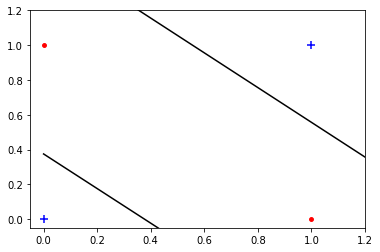

In [12]:
x1 = [i for i in range(3)]
y1_1 = [y(fc1_u1_thetas[0].item(), fc1_u1_thetas[1].item(), fc1_u1_bias.item(), x) for x in range(3)]
y1_2 = [y(fc1_u2_thetas[0].item(), fc1_u2_thetas[1].item(), fc1_u2_bias.item(), x) for x in range(3)]

plt.scatter(x=[0, 1], y=[0, 1], s=60, marker='+', c='b')
plt.scatter(x=[0, 1], y=[1, 0], s=60, marker='.', c='r')
plt.axis([-0.05, 1.2, -0.05, 1.2])
plt.plot(x1, y1_1, c='k')
plt.plot(x1, y1_2, c='k')
plt.show()

In [13]:
# Implements operations in fc1.
z1_1 = [
    z(0, 0, fc1_u1_thetas[0].item(), fc1_u1_thetas[1].item(), fc1_u1_bias.item()), 
    z(0, 1, fc1_u1_thetas[0].item(), fc1_u1_thetas[1].item(), fc1_u1_bias.item()),
    z(1, 0, fc1_u1_thetas[0].item(), fc1_u1_thetas[1].item(), fc1_u1_bias.item()), 
    z(1, 1, fc1_u1_thetas[0].item(), fc1_u1_thetas[1].item(), fc1_u1_bias.item())
]
z1_2 = [
    z(0, 0, fc1_u2_thetas[0].item(), fc1_u2_thetas[1].item(), fc1_u2_bias.item()), 
    z(0, 1, fc1_u2_thetas[0].item(), fc1_u2_thetas[1].item(), fc1_u2_bias.item()),
    z(1, 0, fc1_u2_thetas[0].item(), fc1_u2_thetas[1].item(), fc1_u2_bias.item()), 
    z(1, 1, fc1_u2_thetas[0].item(), fc1_u2_thetas[1].item(), fc1_u2_bias.item())
]

a1 = [sign(z) for z in z1_1]
a2 = [sign(z) for z in z1_2]

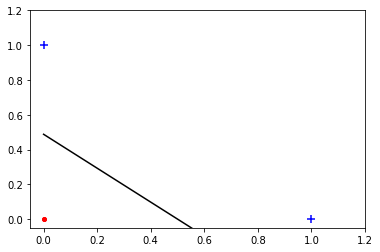

In [14]:
x2 = [i for i in range(3)]
y2 = [y(fc2_thetas[0][0].item(), fc2_thetas[0][1].item(), fc2_bias.item(), x) for x in range(3)]

plt.scatter([a1[0], a1[3]], [a2[0], a2[3]], s=60, marker='+', c='b')
plt.scatter([a1[1], a1[2]], [a2[1], a2[2]], s=60, marker='.', c='r')
plt.axis([-0.05, 1.2, -0.05, 1.2])
plt.plot(x2, y2, c='k')
plt.show()

## 5. Test the Model

In [15]:
outputs = net(xor_training_examples)
print(outputs)

tensor([[0.0344],
        [0.9595],
        [0.9594],
        [0.0398]], grad_fn=<SigmoidBackward>)
